In [48]:
# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [50]:
# Declare a Base using `automap_base()`
Base = automap_base()

Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base

print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.station'>, <class 'sqlalchemy.ext.automap.measurement'>]


In [51]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [52]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
query = "SELECT max(date) from measurement"

with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())

[('2017-08-23',)]


In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# NOTE: I typed up this query using my knowledge.  When things went wrong I verified against the version that professor booth pulled together
#CONT: and modified it based on what I was seeing.

query2 = """
    SELECT
        date,
        station,
        prcp
    FROM
        measurement
    WHERE
        date >= '2016-08-23'
    ORDER BY
        date ASC;

"""


# Save the query results as a Pandas DataFrame. Explicitly set the column names

df2 = pd.read_sql(text(query2), con=engine)

df2.rename(columns = {"date": "Date", "station": "Station", "prcp": "Precipitation"}, inplace = True) 

df2.sort_values(by="Date", ascending=True).reset_index(drop=True)

df2.head()




,Date,Station,Precipitation
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00513117,0.15
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00517948,NaN
4,2016-08-23,USC00519523,0.02


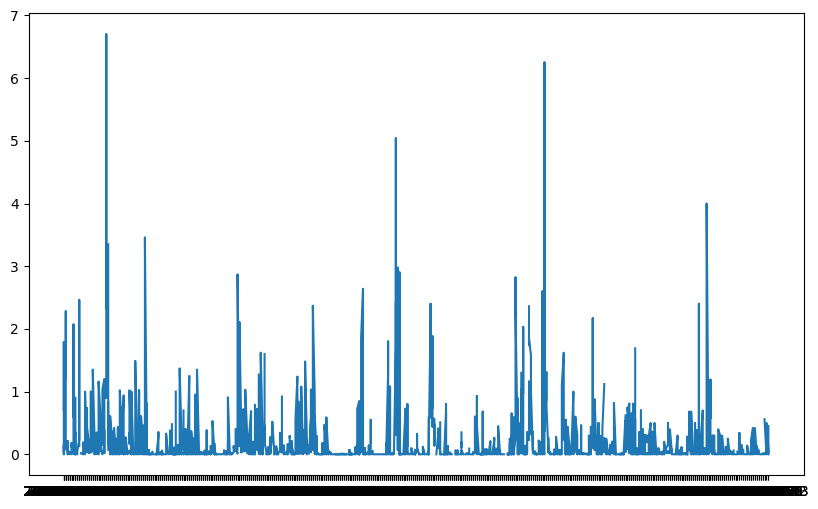

In [69]:
# Use Pandas Plotting with Matplotlib to plot the data
# My version of the plot.
plt.figure(figsize = (10,6))

plt.plot(df2.Date, df2.Precipitation)

plt.show()

In [66]:
start_date = datetime.date(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= start_date).\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df2 = pd.DataFrame(results, columns=["Date", "Station", "Precipitation"])

# Sort the dataframe by date
df2["Date"] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
df2.head()

,Date,Station,Precipitation
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00513117,0.15
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00517948,NaN
4,2016-08-23,USC00519523,0.02


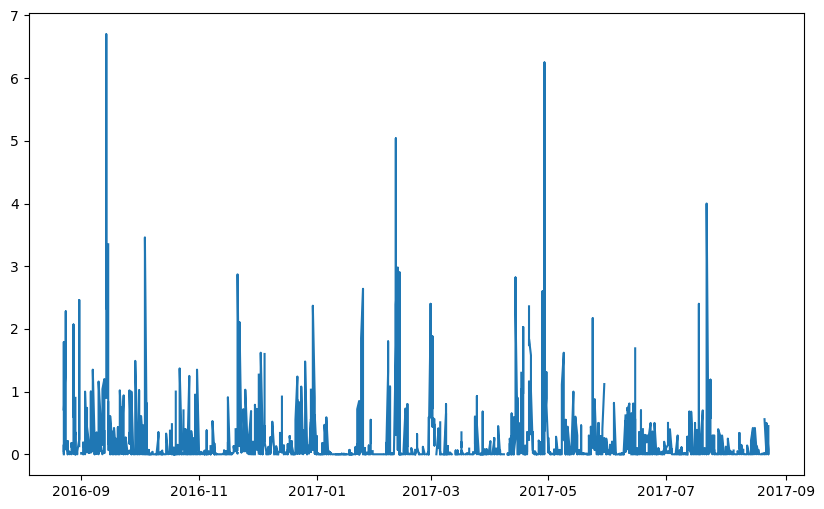

In [67]:
#  Taken from Professor Booth's version, can't get the x-tick on my version to show correctly.
plt.figure(figsize=(10, 6))

plt.plot(df2.Date, df2.Precipitation)
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
query3 = """
    SELECT
        count(id)
    FROM
        station;
        

"""
df3 = pd.read_sql(text(query3), con=engine)
df3.head()

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)note: for count I referenced Professor Booth's to get num_rows
# This further informed the "Order By", but the base query was written by me, and modified based on notes via Professor Booth's work.


query4 = """
    SELECT
        station,
        COUNT(*) as num_rows
    FROM
        measurement
    GROUP BY
        station
    ORDER BY
        num_rows desc;

"""
df4 = pd.read_sql(text(query4), con=engine)
df4.head()


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query5= """
    SELECT
        station,
        MAX(tobs) as max_temp,
        MIN(tobs) as min_temp,
        AVG(tobs) as average_temp
    FROM
        measurement
    WHERE
        station = 'USC00519281'

"""
df5 = pd.read_sql(text(query5), con=engine)
df5.head()

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query6 = """
    SELECT
        date,
        station,
        tobs
    FROM
        measurement
    WHERE
        station = 'USC00519281' AND
        date >= '2016-08-23'
    ORDER BY
        date ASC;

"""


# Save the query results as a Pandas DataFrame. Explicitly set the column names

df6 = pd.read_sql(text(query6), con=engine)

df6.rename(columns = {"date": "Date",  "station": "Station", "tobs": "Temperature"}, inplace = True) 

df6.sort_values(by="Date", ascending=True).reset_index(drop=True)

df6.head()



,Date,Station,Temperature
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


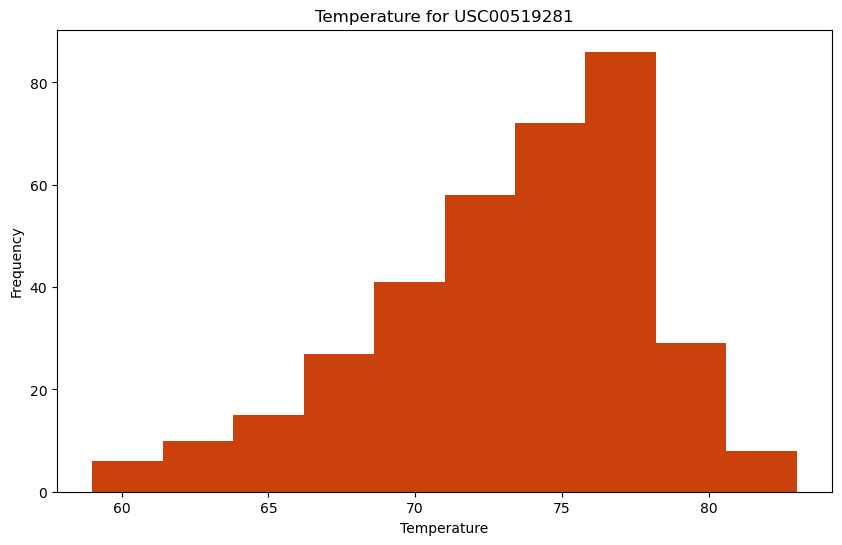

In [71]:
plt.figure(figsize=(10,6))
plt.hist(df6.Temperature, color="#CB410B")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("Temperature for USC00519281")
plt.show()

# Close Session

In [72]:
# Close Session
session.close()
